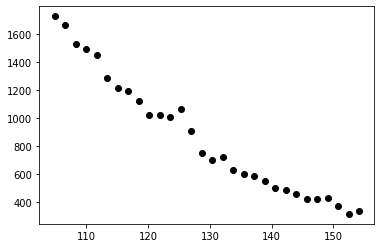

In [2]:
import matplotlib.pyplot as plt# Making plots.
import numpy as np# Random number generation.
import STOM_higgs_tools


vals = STOM_higgs_tools.generate_data() 

bin_heights, bin_edges = np.histogram(vals, range= [104, 155], bins = 30)
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
plt.plot(bin_centers,bin_heights, 'o', color="black") ## using bin_centers rather than edges
plt.show()

In [77]:
def CHi2(lamb):# chi^2 of histogram expectation , rescaled
    CHi_indi=0
    for i in range(0,30):
        if bin_centers[i]<120:
            CHi_indi+=((((bin_heights[i]/bin_heights[0])-sp.e**(-(bin_centers[i]-bin_centers[0])/lamb))**2)/(bin_heights[i]/bin_heights[0]))
    return CHi_indi

lamb = sp.optimize.fmin(CHi2,33,full_output=True,disp=False)[0]

In [78]:
print(lamb)

[31.50408325]


In [41]:
import scipy as sp
from scipy import integrate
data_area = integrate.simps(bin_heights[bin_centers<=120])
print(data_area)

11263.0


In [27]:
def compare_params(params):
    plt.plot(bin_centers,bin_heights, 'o', color="black")
    plt.plot(bin_centers, background(params, bin_centers))
    plt.show()

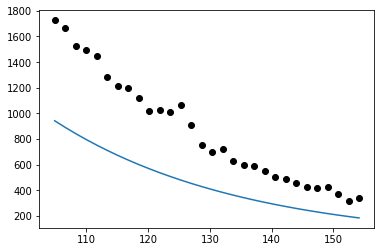

In [31]:
 compare_params([3e4, 30.3])

In [29]:
from scipy.optimize import fmin

def background(params, x):
    #the background exponential function
    A, lamb = params
    return A*np.exp(-x/lamb)

def chi_2(measured, expected):
    #standard chi2
    chi_2 = np.sum((measured-expected)**2/expected)
    return chi_2

def fit_function_2(params):
    #the provided in the script uses reduced chi2
    A, lamb = params
    return STOM_higgs_tools.get_B_chi(vals, (104, 120), 9, A,lamb)


def fit_function(params):
    #the function built by us, normal chi2
    return chi_2(bin_heights[bin_centers<=120], background(params, bin_centers[bin_centers<=120]))

def make_minimize_cb(path=[]):
    #function to record the path of the minimization
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

initial_val = np.array([3e4, 30.3])
path_reduced=[initial_val]
minimised_val_reduced = fmin(fit_function_2,initial_val, callback=make_minimize_cb(path_reduced))
print(minimised_val_reduced)
initial_val = np.array([3e4, 30.3])
path=[initial_val]
minimised_val = fmin(fit_function,initial_val, callback=make_minimize_cb(path))
print(minimised_val)

Optimization terminated successfully.
         Current function value: 0.748537
         Iterations: 114
         Function evaluations: 222
[5.55569810e+04 3.06770988e+01]
Optimization terminated successfully.
         Current function value: 5.368284
         Iterations: 100
         Function evaluations: 192
[5.26316001e+04 3.07515954e+01]


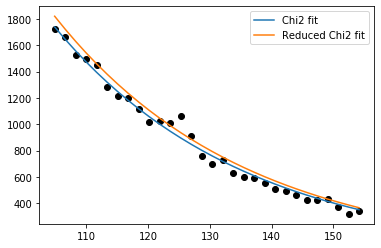

In [32]:
plt.plot(bin_centers,bin_heights, 'o', color="black")
plt.plot(bin_centers, background(minimised_val, bin_centers), label="Chi2 fit")
plt.plot(bin_centers, background(minimised_val_reduced, bin_centers), label="Reduced Chi2 fit")
plt.legend()
plt.show()

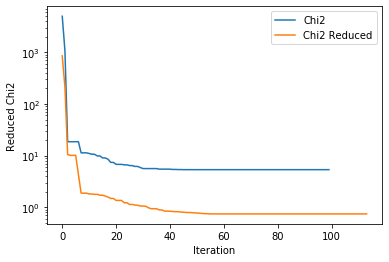

In [33]:
 path_stacked = np.vstack(path)
chi_2_progress = np.apply_along_axis(fit_function, 1, path_stacked)
plt.plot(chi_2_progress, label="Chi2")
path_stacked_reduced = np.vstack(path_reduced)
chi_2_progress_reduced = np.apply_along_axis(fit_function_2, 1, path_stacked_reduced)
plt.plot(chi_2_progress_reduced, label="Chi2 Reduced")
plt.ylabel("Reduced Chi2")
plt.yscale("log")
plt.xlabel("Iteration")
plt.legend()
plt.show()

In [34]:
print(STOM_higgs_tools.get_B_chi(vals, (104, 120), 9, minimised_val_reduced[0],minimised_val_reduced[1]))
print(STOM_higgs_tools.get_B_chi(vals, (104, 120), 9, minimised_val[0],minimised_val[1]))

0.7485366660860603
4.598796263538695


In [35]:
reduced_chi2_whole_interval = (STOM_higgs_tools.get_B_chi(vals, (104, 155),
                                                          30, minimised_val_reduced[0],minimised_val_reduced[1]))
print(reduced_chi2_whole_interval)

5.1132392174334


In [36]:
 noise_vals = []
for i in range(1000):
    noise_vals.append(fmin(fit_function,[0, 30]))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [37]:
 from scipy import stats
def gauss(x, A_signal, mean, sigma):
    gauss = A_signal*stats.norm.pdf(x, loc=mean, scale=sigma)
    return gauss

In [38]:
 def higgs_func(x, A, lambd, A_gauss, mean, sigma):
    return background((A, lambd), x) + gauss(x, A_gauss, mean, sigma)
final_chi2 = chi_2(bin_heights, higgs_func(bin_centers, 9.45484383e+04, 2.63539145e+01, 700, 125, 1.5))
print(final_chi2)

177.31294609668572


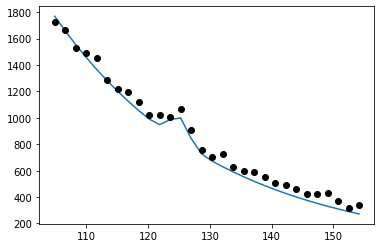

In [39]:
plt.plot(bin_centers, higgs_func(bin_centers, 9.45484383e+04, 2.63539145e+01, 700, 125, 1.5))
plt.plot(bin_centers, bin_heights, 'o', color="black")
plt.show()